In [18]:
import torch
from diffusers import DDIMPipeline
import matplotlib.pyplot as plt

In [19]:
# Setting random seed for reproducibility
torch.manual_seed(42)

In [20]:
# Loading DDIM pipeline with CIFAR-10 model
model_id = "google/ddpm-cifar10-32"
ddim = DDIMPipeline.from_pretrained(model_id)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

In [21]:
# Setting our device
device = "cuda" if torch.cuda.is_available() else "cpu"
ddim.to(device)

DDIMPipeline {
  "_class_name": "DDIMPipeline",
  "_diffusers_version": "0.3.0",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [25]:
num_images = 1
# Sampling steps (I added more to better see images)
steps_list = [10, 50, 100, 500, 1000, 5000, 10000, 25000]  # 10, 50, 100 accounted for along with my extra steps
generated_images = []

In [26]:
# Generating images with different sampling steps
for num_steps in steps_list:
    # Setting the number of inference steps in scheduler
    ddim.scheduler.set_timesteps(num_steps)
    
    # Starting from random initial noise for generating a new image
    latents = torch.randn(
        (num_images, ddim.unet.in_channels, ddim.unet.sample_size, ddim.unet.sample_size),
        device=device
    )

    # Running denoising loop
    with torch.no_grad():
        for t in ddim.scheduler.timesteps:
            # Predicting noise residual
            noise_pred = ddim.unet(latents, t).sample

            # Computing the previous noisy sample x_t -> x_t-1
            latents = ddim.scheduler.step(noise_pred, t, latents).prev_sample

    # Decoding the latents to image
    image = latents

    # Post-processing image
    image = (image / 2 + 0.5).clamp(0, 1)  # Scaling to [0, 1]
    image = image.cpu().permute(0, 2, 3, 1).numpy()[0]

    # Appending generated image to the list
    generated_images.append(image)

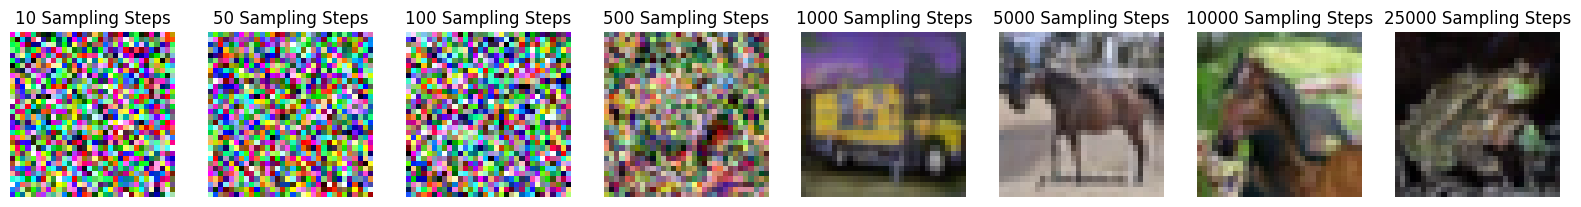

In [27]:
# Plotting generated images
fig, axes = plt.subplots(1, len(steps_list), figsize=(20, 5))

for ax, img, steps in zip(axes, generated_images, steps_list):
    ax.imshow(img)
    ax.set_title(f"{steps} Sampling Steps")
    ax.axis('off')

plt.show()